In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../Featre Engineering/New_KDDTrain+.txt')

In [11]:
df.head()

,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,2,2,0.0,0.0,1.00,0.00,150,25,0.17,0.03,0.17,0.05,0.00,11
1,13,1,0.0,0.0,0.08,0.15,255,1,0.00,0.60,0.88,0.00,0.00,11
2,123,6,0.0,0.0,0.05,0.07,255,26,0.10,0.05,0.00,0.00,0.00,9
3,5,5,0.0,0.0,1.00,0.00,30,255,1.00,0.00,0.03,0.00,0.01,11
4,30,32,0.0,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 14 columns):
count                          125973 non-null int64
srv_count                      125973 non-null int64
rerror_rate                    125973 non-null float64
srv_rerror_rate                125973 non-null float64
same_srv_rate                  125973 non-null float64
diff_srv_rate                  125973 non-null float64
dst_host_count                 125973 non-null int64
dst_host_srv_count             125973 non-null int64
dst_host_same_srv_rate         125973 non-null float64
dst_host_diff_srv_rate         125973 non-null float64
dst_host_same_src_port_rate    125973 non-null float64
dst_host_rerror_rate           125973 non-null float64
dst_host_srv_rerror_rate       125973 non-null float64
labels                         125973 non-null int64
dtypes: float64(9), int64(5)
memory usage: 13.5 MB


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('labels',axis=1)
y = df['labels']

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
standard_scaler = StandardScaler()
Scaled_X = standard_scaler.fit_transform(X)
X = pd.DataFrame(Scaled_X,columns=X.columns)
X.head()

,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.717045,-0.354343,-0.374362,-0.374432,0.771283,-0.349683,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.224532,-0.376387
1,-0.620982,-0.368110,-0.374362,-0.374432,-1.321428,0.482201,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.387635,-0.376387
2,0.339648,-0.299273,-0.374362,-0.374432,-1.389669,0.038529,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.387635,-0.376387
3,-0.690846,-0.313041,-0.374362,-0.374432,0.771283,-0.349683,-1.533670,1.258754,1.066401,-0.439078,-0.383108,-0.387635,-0.345084
4,-0.472521,0.058678,-0.374362,-0.374432,0.771283,-0.349683,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.387635,-0.376387


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
predicted_labels = knn_model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
print(classification_report(y_test,predicted_labels))
print('\n')
print(accuracy_score(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       310
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         3
           3       0.89      0.81      0.85        21
           4       1.00      0.80      0.89         5
           5       0.81      0.87      0.84      1224
           6       0.50      0.29      0.36         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     13577
          10       0.76      0.67      0.71       512
          11       0.99      0.99      0.99     22193
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.65      0.61      0.63        70
          15       0.99      0.99      0.99       954
          16       0.00      0.00      0.00         4
          17       0.99    

/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
err_rate = []
for i in range(1,30):
    knn_test = KNeighborsClassifier(n_neighbors=i)
    knn_test.fit(X_train,y_train)
    pred_i = knn_test.predict(X_test)
    err_rate.append(np.mean(y_test != pred_i))

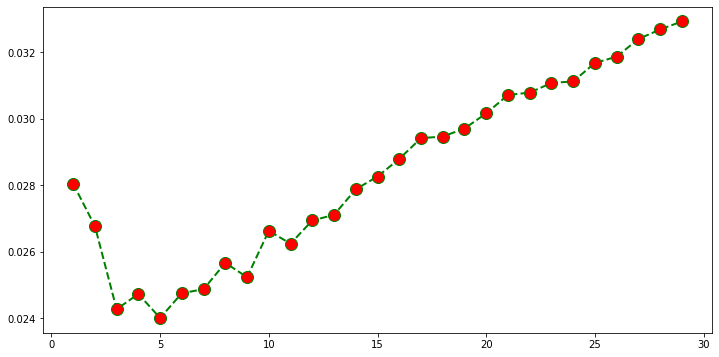

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),err_rate,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,markerfacecolor='red')

# so our assumed value of n_neighbors is true that 5 at that point error rate obtateind is too small